In [2]:
!nvidia-smi

Mon Apr 20 09:28:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
!python --version

Python 3.6.9


In [5]:
!pwd

/content


In [6]:
!pip show torch

Name: torch
Version: 1.4.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: torchvision, torchtext, fastai


In [0]:
import torch

In [8]:
torch.cuda.is_available()

True

In [9]:
torch.cuda.device_count()

1

In [11]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [0]:
# default device
cuda = torch.device('cuda')

In [16]:
cuda

device(type='cuda')

In [0]:
#allocate tensor to gpu
a = torch.tensor([1,2],device=cuda)

In [0]:
b = torch.tensor([1,2])
b2 = b.cuda()
c = torch.tensor([5,6]).to(device=cuda)

In [20]:
print(b)
print(b2)
print(c)

tensor([1, 2])
tensor([1, 2], device='cuda:0')
tensor([5, 6], device='cuda:0')


In [21]:
print(a+b2)

tensor([2, 4], device='cuda:0')


In [22]:
print(a+b)

RuntimeError: ignored

In [0]:
#model = Net().cuda()

In [0]:
torch.cuda.empty_cache()

In [0]:
!mkdir prac


In [0]:
!mkdir prac/p

In [27]:
from PIL import Image as img

im = img.open('./prac/p/Biology_ot.JPG')

print(im.size)

(762, 475)


In [0]:
from torchvision import transforms

In [0]:
trans = transforms.ToTensor()
x = trans(im)

In [30]:
print(x)

tensor([[[0.0118, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0118, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0118, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0588, 0.0588, 0.0588,  ..., 0.0588, 0.0588, 0.0588],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1216, 0.1216, 0.1216,  ..., 0.1216, 0.1216, 0.1216]],

        [[0.0000, 0.0039, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0039, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0039, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         [0.4941, 0.4941, 0.4941,  ..., 0.4941, 0.4941, 0.4941]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

In [31]:
print(x.size())

torch.Size([3, 475, 762])


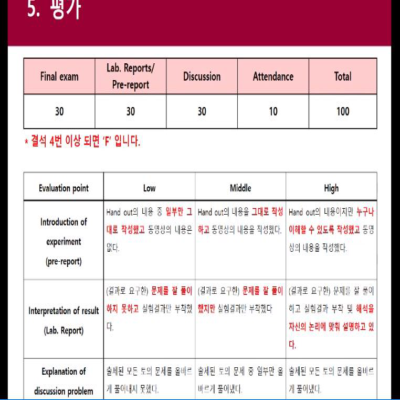

(400, 400)


In [36]:
trans = transforms.Resize((400,400))

resized = trans(im)

display(resized)

print(resized.size)

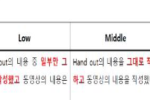

In [37]:
trans = transforms.CenterCrop((100,150))
newim = trans(resized)
display(newim)

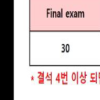

In [42]:
trans = transforms.RandomCrop((100,100),padding=30,padding_mode='constant')
newim = trans(resized)
display(newim)

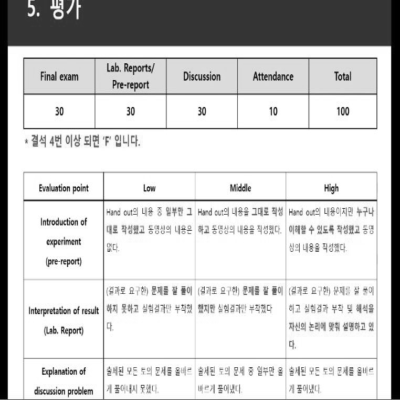

In [43]:
trans = transforms.Grayscale()

newim = trans(resized)

display(newim)

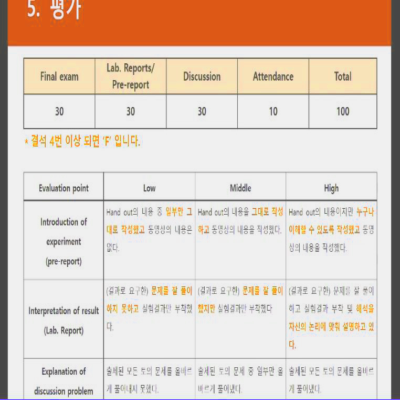

In [55]:
trans = transforms.ColorJitter(brightness=0,contrast=3,saturation=6,hue=0.3)
newim = trans(resized)
display(newim)

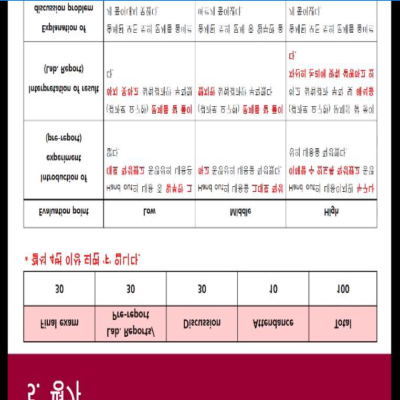

In [56]:
trans = transforms.RandomVerticalFlip(p=1)
newim = trans(resized)
display(newim)

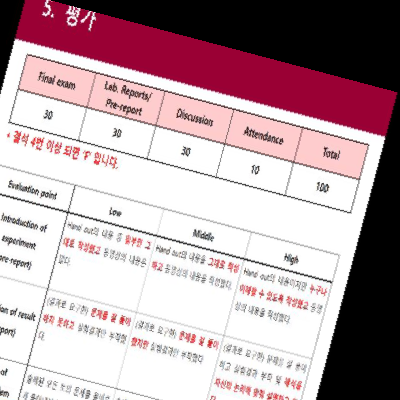

In [57]:
trans = transforms.RandomRotation(degrees=40,center=(40,70))
newim = trans(resized)
display(newim)

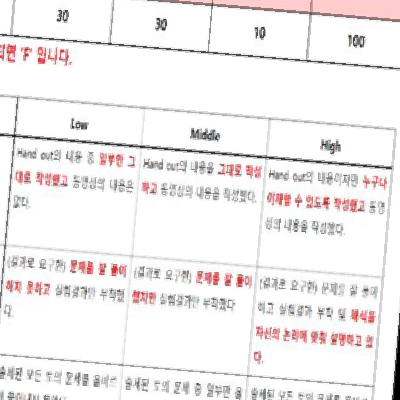

In [60]:
trans = transforms.RandomAffine(degrees=20,translate=(0.2,0.8),scale=(0.5,1.5))
newim = trans(resized)
display(newim)

In [68]:
trans = transforms.Resize((4,6))
x = trans(resized)
display(x)
trans = transforms.ToTensor()
x = trans(x)
print(x)

tensor([[[0.7569, 0.8000, 0.7961, 0.8039, 0.8078, 0.7451],
         [0.8784, 0.9373, 0.9529, 0.9529, 0.9529, 0.8784],
         [0.8745, 0.9333, 0.9529, 0.9490, 0.9412, 0.8706],
         [0.8667, 0.9294, 0.9529, 0.9529, 0.9451, 0.8706]],

        [[0.5137, 0.5176, 0.5098, 0.5176, 0.5176, 0.4902],
         [0.8510, 0.9020, 0.9294, 0.9333, 0.9333, 0.8627],
         [0.8745, 0.9255, 0.9373, 0.9412, 0.9255, 0.8588],
         [0.8706, 0.9255, 0.9490, 0.9490, 0.9333, 0.8588]],

        [[0.5843, 0.5961, 0.5922, 0.6000, 0.6000, 0.5647],
         [0.8510, 0.9020, 0.9294, 0.9333, 0.9333, 0.8627],
         [0.8745, 0.9255, 0.9412, 0.9412, 0.9255, 0.8588],
         [0.8706, 0.9294, 0.9490, 0.9490, 0.9373, 0.8627]]])


In [69]:
trans = transforms.Normalize(mean=(0.5,0.3,0.2),std=(0.5,0.4,0.5))
newx = trans(x)
print(newx)

tensor([[[0.5137, 0.6000, 0.5922, 0.6078, 0.6157, 0.4902],
         [0.7569, 0.8745, 0.9059, 0.9059, 0.9059, 0.7569],
         [0.7490, 0.8667, 0.9059, 0.8980, 0.8824, 0.7412],
         [0.7333, 0.8588, 0.9059, 0.9059, 0.8902, 0.7412]],

        [[0.5343, 0.5441, 0.5245, 0.5441, 0.5441, 0.4755],
         [1.3775, 1.5049, 1.5735, 1.5833, 1.5833, 1.4069],
         [1.4363, 1.5637, 1.5931, 1.6029, 1.5637, 1.3971],
         [1.4265, 1.5637, 1.6225, 1.6225, 1.5833, 1.3971]],

        [[0.7686, 0.7922, 0.7843, 0.8000, 0.8000, 0.7294],
         [1.3020, 1.4039, 1.4588, 1.4667, 1.4667, 1.3255],
         [1.3490, 1.4510, 1.4824, 1.4824, 1.4510, 1.3176],
         [1.3412, 1.4588, 1.4980, 1.4980, 1.4745, 1.3255]]])


In [70]:
trans = transforms.RandomErasing(p=1,scale=(0.1,0.3)) # change to 0
newx = trans(x)
print(newx)

tensor([[[0.7569, 0.8000, 0.7961, 0.8039, 0.8078, 0.7451],
         [0.8784, 0.9373, 0.9529, 0.9529, 0.9529, 0.8784],
         [0.8745, 0.0000, 0.0000, 0.9490, 0.9412, 0.8706],
         [0.8667, 0.0000, 0.0000, 0.9529, 0.9451, 0.8706]],

        [[0.5137, 0.5176, 0.5098, 0.5176, 0.5176, 0.4902],
         [0.8510, 0.9020, 0.9294, 0.9333, 0.9333, 0.8627],
         [0.8745, 0.0000, 0.0000, 0.9412, 0.9255, 0.8588],
         [0.8706, 0.0000, 0.0000, 0.9490, 0.9333, 0.8588]],

        [[0.5843, 0.5961, 0.5922, 0.6000, 0.6000, 0.5647],
         [0.8510, 0.9020, 0.9294, 0.9333, 0.9333, 0.8627],
         [0.8745, 0.0000, 0.0000, 0.9412, 0.9255, 0.8588],
         [0.8706, 0.0000, 0.0000, 0.9490, 0.9373, 0.8627]]])


In [0]:
transform = transforms.Compose([
                                transforms.Resize((100,100)),
                                transforms.Grayscale(),
                                transforms.RandomAffine(degrees=20,translate=(0.1,0.1)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5),std=(0.5)),
])

In [74]:
!ls -lah ./prac

total 16K
drwxr-xr-x 4 root root 4.0K Apr 20 09:56 .
drwxr-xr-x 1 root root 4.0K Apr 20 09:56 ..
drwxr-xr-x 2 root root 4.0K Apr 20 09:56 .ipynb_checkpoints
drwxr-xr-x 2 root root 4.0K Apr 20 09:56 p


In [75]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   32G   34G  49% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
tmpfs           6.4G   16K  6.4G   1% /var/colab
/dev/sda1        75G   33G   43G  44% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           1.0E  556M  1.0E   1% /content/drive


In [0]:
import torchvision

In [0]:
imset = torchvision.datasets.ImageFolder(root='./prac',transform=transform)

In [79]:
print(imset)
print(len(imset))
print(imset.classes)
print(imset.imgs)

Dataset ImageFolder
    Number of datapoints: 1
    Root location: ./prac
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               RandomAffine(degrees=(-20, 20), translate=(0.1, 0.1))
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
1
['.ipynb_checkpoints', 'p']
[('./prac/p/Biology_ot.JPG', 1)]


In [84]:
import numpy as np
x = torch.tensor((np.random.randn(4,6).view(12,2))
y = torch.tensor(np.random.randint(0,2,12))
dset = torch.utils.data.TensorDataset(x,y)

ValueError: ignored

In [85]:
from torchvision.datasets import MNIST

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
mnist = MNIST(root='./',train=True,transform=transform,download=True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [0]:
tr,val = torch.utils.data.random_split(mnist,[int(len(mnist)*0.8),int(len(mnist)*0.2)])

In [87]:
print(tr)
print(len(tr))
print(val)
print(len(val))

48000
12000


In [88]:
indices = list(range(len(mnist)))
np.random.shuffle(indices)
print(indices)

[1135, 5087, 47863, 57781, 6343, 16742, 40405, 14825, 17682, 25165, 48702, 32715, 26702, 36569, 25618, 46895, 47305, 8390, 37809, 5933, 54554, 14491, 25040, 12883, 10430, 37347, 40060, 1886, 8193, 38067, 22439, 3008, 29607, 36935, 54339, 15079, 49362, 32275, 52530, 18654, 48526, 50117, 55295, 52159, 33884, 12382, 53703, 5047, 36844, 2198, 5871, 9346, 52296, 49166, 19473, 37798, 26399, 23436, 59407, 54677, 4435, 32673, 8484, 38344, 55079, 4291, 55909, 30360, 53166, 2226, 25446, 40835, 56189, 38084, 34716, 38673, 7974, 38099, 10170, 3483, 1766, 53431, 27435, 57716, 52408, 9268, 24360, 31868, 45715, 53047, 43309, 24191, 34224, 51702, 5279, 51709, 8423, 9113, 10302, 57688, 1847, 18309, 46109, 49949, 52551, 465, 24281, 28296, 24443, 53742, 39420, 5627, 44409, 14370, 10033, 27149, 40666, 20101, 39161, 27910, 13336, 2928, 2453, 14129, 11126, 35741, 52936, 45353, 6972, 58853, 46537, 35228, 23116, 30457, 56301, 43527, 29667, 30128, 48306, 38270, 28737, 52809, 25644, 12878, 19912, 11852, 35175, 

In [0]:
split = int(np.floor(0.8*len(mnist)))
tr_idx ,val_idx = indices[:split],indices[split:]

In [0]:
from torch.utils.data.sampler import SubsetRandomSampler

tr_sampler = SubsetRandomSampler(tr_idx)
val_sampler = SubsetRandomSampler(val_idx)


In [0]:
tr_loader = torch.utils.data.DataLoader(mnist,batch_size=100,sampler=tr_sampler)
val_loader = torch.utils.data.DataLoader(mnist,batch_size=100,sampler=val_sampler)

In [0]:
import torch

In [93]:
x = torch.ones(2,2,requires_grad=True)
print(x)


tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [94]:
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [95]:
print(y.grad_fn)

In [96]:
z = y*y*3
out = z.mean()
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [97]:
a = torch.randn(2,2)
a = ((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


In [0]:
out.backward()

In [100]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
